# Part II - (Ford Gobike System Data)
## by (Henry Ije)

## Investigation Overview

> The overall goal of this project is to undestand or derieve how days of the week, hour of the day, gender and age affects the number of trips and the duration of trips


## Dataset Overview
> This data contains information about ford gobike system data convering Sans Francisco Bay area. There are 183, 412 rides with columns such as duration_sec, bike_id, user_type, member_birth_year, member_gender, bike sharing for all trip et cetera. 

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
fordbike = pd.read_csv("201902-fordgobike-tripdata.csv")

In [4]:
### Drop data with missing values
fordbike.dropna(inplace=True)

# Convert the start and end time column to Date Time
fordbike.start_time = pd.to_datetime(fordbike.start_time)
fordbike.end_time = pd.to_datetime(fordbike.end_time)

# Convert the bike id to string
fordbike.bike_id = fordbike.bike_id.astype(str)


import datetime as dt
fordbike["start_hour"] = fordbike["start_time"].dt.hour
fordbike["start_day"] = fordbike["start_time"].dt.day_name()
fordbike["start_month"] = fordbike["start_time"].dt.month_name()
fordbike["start_year"] = fordbike["start_time"].dt.year
fordbike["start_year"] = fordbike["start_time"].astype(str)

fordbike["end_hour"] = fordbike["end_time"].dt.hour
fordbike["end_day"] = fordbike["end_time"].dt.day_name()
fordbike["end_month"] = fordbike["end_time"].dt.month_name()
fordbike["end_year"] = fordbike["end_time"].dt.year
fordbike["end_year"] = fordbike["end_time"].astype(str)

fordbike["member_birth_age"] = 2019 - fordbike["member_birth_year"]

> ### What is the distribution of duration in sec?

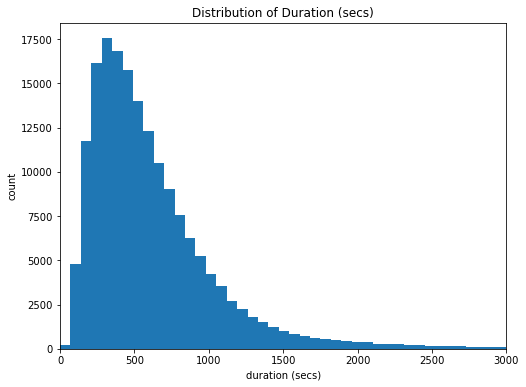

In [5]:
# Histogram showing the distribution of data
def histplot():
   bins = np.arange(0, fordbike["duration_sec"].max()+70, 70)
   plt.figure(figsize=[8, 6])
   plt.hist(data=fordbike, x="duration_sec", bins=bins);
   plt.xlabel("duration (secs)")
   plt.ylabel("count")
   plt.xlim(0, 3000)
   plt.title("Distribution of Duration (secs)");
histplot()

> The histogram is right skewed and the most frequent duration is between 400 secs 

### What is the relationship between day of the week and number of rides?

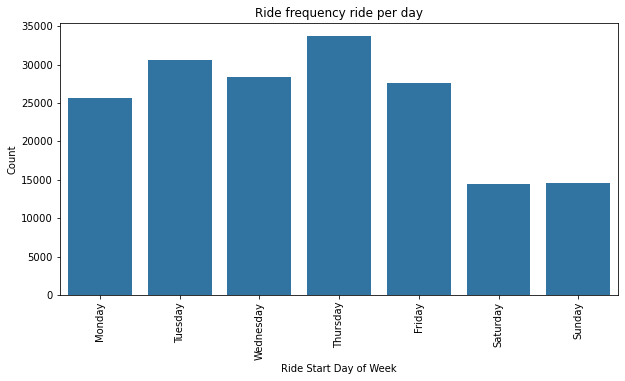

In [6]:
base_color = sb.color_palette()[0]
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
days_of_week_cat = pd.api.types.CategoricalDtype(ordered=True, categories=days_of_week)
fordbike['start_day'] = fordbike['start_day'].astype(days_of_week_cat)
plt.figure(figsize=[10, 5])
sb.countplot(data=fordbike, x='start_day', color=base_color);
plt.xlabel('Ride Start Day of Week');
plt.ylabel('Count');
plt.xticks(rotation=90);
plt.title("Ride frequency ride per day");

> From the bar chart above, most rides were taken on thursday followed by tuesday while saturday and sunday has the lowest number of rides.

### What gender travel the longest duration with respect to user type?

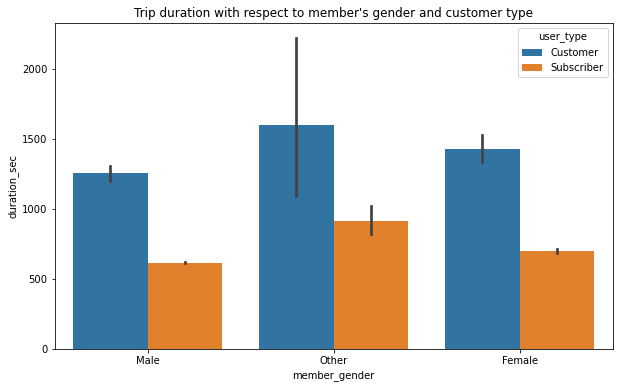

In [7]:
plt.figure(figsize=[10,6])
ax = sb.barplot(data=fordbike, x="member_gender", y="duration_sec", hue="user_type")
plt.title("Trip duration with respect to member's gender and customer type");

From this visualisation, the other gender travelled the lonest duration for customers and subscribers. Followed by femalse then males.

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [ ]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt